# Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Make float values look better
# We will use USA and UK format system
pd.options.display.float_format = '{:,.1f}'.format
sns.set_style('darkgrid')
sns.set_palette("Set2")

# Importing Data

In [34]:
mov = pd.read_csv("movies_1980_2020_30k.csv")

In [35]:
mov.head()

,Title,Director,Genre,Release Date,Duration,Rating
0,Key entire popular.,Anthony Becker,Horror,1981-05-12,102,6.8
1,Gun husband reveal.,William Johnson,Documentary,2016-06-13,92,7.6
2,Crime cover.,Amy Le,Drama,1988-03-22,144,5.5
3,Challenge.,Andrea Martinez,Romance,2013-04-01,161,2.0
4,Close study.,Michael Rodgers,Fantasy,2012-10-18,177,3.7


# Description of Data

In [8]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         30000 non-null  object 
 1   Director      30000 non-null  object 
 2   Genre         30000 non-null  object 
 3   Release Date  30000 non-null  object 
 4   Duration      30000 non-null  int64  
 5   Rating        30000 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
mov.shape

(30000, 6)

# Data Preparation

In [10]:
mov.isnull().sum()

Title           0
Director        0
Genre           0
Release Date    0
Duration        0
Rating          0
dtype: int64

# Analysing the Data

# Checking titles of films with rating of 9 to 10

In [11]:
mov[(mov['Rating'] >= 9.0) & (mov['Rating'] <= 10.0 )]['Title']

14       Check study issue.
15              Safe group.
30         Movement inside.
39        Thought increase.
53       Never night laugh.
                ...        
29924        Serve someone.
29932         Health color.
29944        Hard maintain.
29952        Natural child.
29988       Situation baby.
Name: Title, Length: 3519, dtype: object

# Checking films with minimum rating

In [12]:
mov[mov['Rating'] == mov['Rating'].min()]

,Title,Director,Genre,Release Date,Duration,Rating
82,Third.,Stephen Charles,Sci-Fi,1982-06-04,179,1.0
166,But including.,Dennis Morales,Sci-Fi,1995-08-23,144,1.0
805,Live service hear.,Stacy Flores,Thriller,1994-07-22,134,1.0
1144,Top forward class.,Thomas Jenkins,Sci-Fi,2016-10-26,70,1.0
1194,Cell understand.,Jennifer Williams,Adventure,1999-07-16,102,1.0
...,...,...,...,...,...,...
29340,Consumer raise certainly matter.,Samuel Terry,Comedy,2016-01-10,81,1.0
29847,Other order social commercial.,Susan Moore,Horror,2002-05-22,100,1.0
29904,Walk total probably.,Barbara Morgan,Drama,2009-11-24,137,1.0
29935,Word pretty program.,Evan Allen,Action,2002-04-04,94,1.0


# How many films of each genre

In [13]:
mov['Genre'].value_counts()

Genre
Fantasy        3047
Horror         3027
Sci-Fi         3019
Action         3019
Thriller       3014
Romance        2991
Adventure      2990
Drama          2982
Comedy         2969
Documentary    2942
Name: count, dtype: int64

# films of each year that were a hit i.e. their rating were between 8 to 10 

In [14]:
mov['Release Year'] = mov['Release Date'].apply(lambda x:x[0:4])

In [15]:
mov.head(2)

,Title,Director,Genre,Release Date,Duration,Rating,Release Year
0,Key entire popular.,Anthony Becker,Horror,1981-05-12,102,6.8,1981
1,Gun husband reveal.,William Johnson,Documentary,2016-06-13,92,7.6,2016


In [16]:
mov[(mov['Rating'] >=8.0) & (mov['Rating'] <=10.0)].groupby('Release Year').value_counts()


Release Year  Title                  Director           Genre      Release Date  Duration  Rating
1980          According piece.       Derrick Kirk       Fantasy    1980-07-01    63        8.1       1
              Act meet.              Kayla Weaver       Drama      1980-12-11    98        9.3       1
              Mind no us knowledge.  Courtney Ross      Horror     1980-11-30    88        8.4       1
              Local.                 Christopher Ortiz  Comedy     1980-10-13    172       8.8       1
              Live fact peace.       Kelly Lawson       Horror     1980-09-09    108       9.3       1
                                                                                                    ..
2020          Likely line.           Craig Jenkins      Sci-Fi     2020-01-17    157       9.2       1
              Like season.           Brandon Mckay      Drama      2020-03-07    173       9.4       1
              Like must so.          Samantha Williams  Drama      2020-06-17 

#  Total hit films of each director

In [17]:
m = mov[(mov['Rating'] >=8.0) & (mov['Rating'] <=10.0)].groupby('Director').count()

In [18]:
m['Title'] 

Director
Aaron Arias          1
Aaron Bullock        1
Aaron Campbell       1
Aaron Contreras      1
Aaron Davis          1
                    ..
Zachary Rodriguez    1
Zachary Waller       1
Zachary Wheeler      1
Zoe Bailey           1
Zoe Berger           1
Name: Title, Length: 6511, dtype: int64

#  What is the average duration of the movies

In [19]:
mov['Duration'].mean().round(2)

120.13

# Who is the director of the oldest movie

In [20]:
mov[mov['Release Date'] == mov['Release Date'].min()][['Title','Director']]

,Title,Director
20969,Far collection shoulder.,Manuel Maldonado


# What is the title of the longest movie in terms of duration

In [21]:
b = mov[mov['Duration']==mov['Duration'].max()][['Title','Duration']]

In [22]:
b

,Title,Duration
111,Large leg we.,180
505,Land guy carry.,180
508,Newspaper brother.,180
587,Involve list admit.,180
595,Two up child.,180
...,...,...
29327,Provide research out.,180
29334,Tend.,180
29376,Draw.,180
29550,Officer road sea dream.,180


In [23]:
b['Title'].count()

259

#  Which movie was released most recently?

In [24]:
mov[mov['Release Date'] == mov['Release Date'].max()][['Title','Release Date','Director']]

,Title,Release Date,Director
19158,Fast.,2020-12-30,Madeline Casey


# Which movie has the longest title?

In [25]:
mov['Title_len']= mov['Title'].apply(lambda x : len(x.strip()))

In [26]:
mov['Title'].apply(lambda x : x if len(x.strip()) == mov['Title_len'].max() else None  ).value_counts()

Title
Young management administration organization.    1
Organization town traditional administration.    1
Name: count, dtype: int64

# How many movies were released before the year 2000?

In [27]:
mov[mov['Release Year']=='2000'][['Title']].count()

Title    736
dtype: int64

# In which range of IMDb Rating are movies most commonly rated?

C:\Users\user\AppData\Local\Temp\ipykernel_7128\565847798.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'score_range', data = mov, palette = 'Set2')


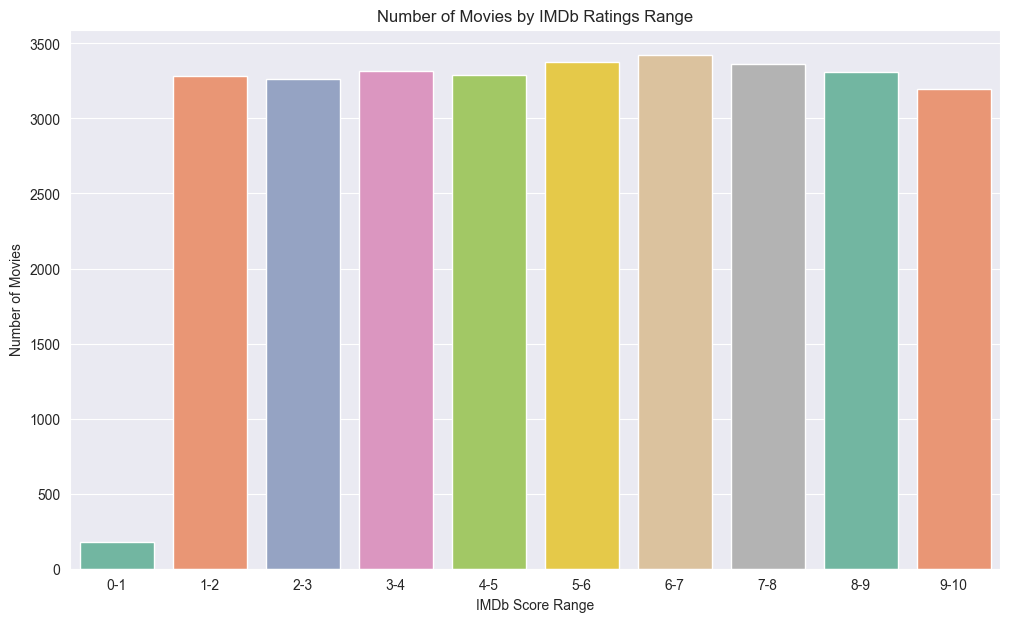

In [31]:
bins = [i for i in range(0,11)]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']
mov['score_range'] = pd.cut(mov['Rating'], bins = bins, labels = labels)

# Plot a bar chart of movie counts by IMDb score range
plt.figure(figsize = (12,7))
sns.countplot(x = 'score_range', data = mov, palette = 'Set2')
plt.title('Number of Movies by IMDb Ratings Range')
plt.xlabel('IMDb Score Range')
plt.ylabel('Number of Movies')
plt.savefig('number_of_movies_by_imdb_score_range.jpg',dpi = 300, bbox_inches = 'tight')
plt.show()

# Which genres have the highest average ratings?

In [33]:
avg_score_by_genre = mov['Rating'].groupby(mov['Genre']).mean()
avg_score_by_genre

Genre
Action        5.5
Adventure     5.5
Comedy        5.5
Documentary   5.6
Drama         5.5
Fantasy       5.5
Horror        5.5
Romance       5.5
Sci-Fi        5.5
Thriller      5.5
Name: Rating, dtype: float64